In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from src.experiment import Experiment
from src.argparser import read_json

### Run experiment with just one image/batch

In [2]:
# Read parameters.
name = "DLGgaussshift"
params = read_json('params/'+name+'.json')

torch.manual_seed(1234)

# Load experiment.
exp = Experiment(params, rand_ims=True)

Running on cpu
Files already downloaded and verified


In [3]:
# Run training
exp.train()

0 144.0252380371
50 0.0012076100
100 0.0000408386
150 0.0000079183


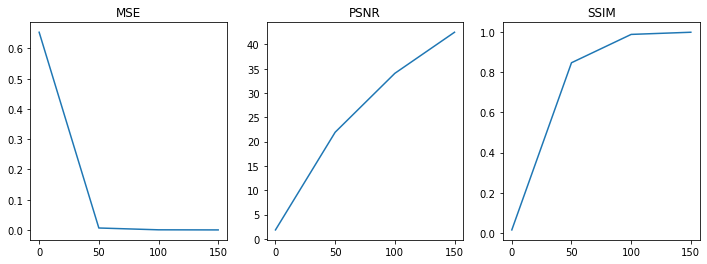

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(exp.iters, exp.losses['mse'][0])
ax[0].set_title('MSE')
ax[1].plot(exp.iters, exp.losses['psnr'][0])
ax[1].set_title('PSNR')
ax[2].plot(exp.iters, exp.losses['ssim'][0])
ax[2].set_title('SSIM')
plt.show()

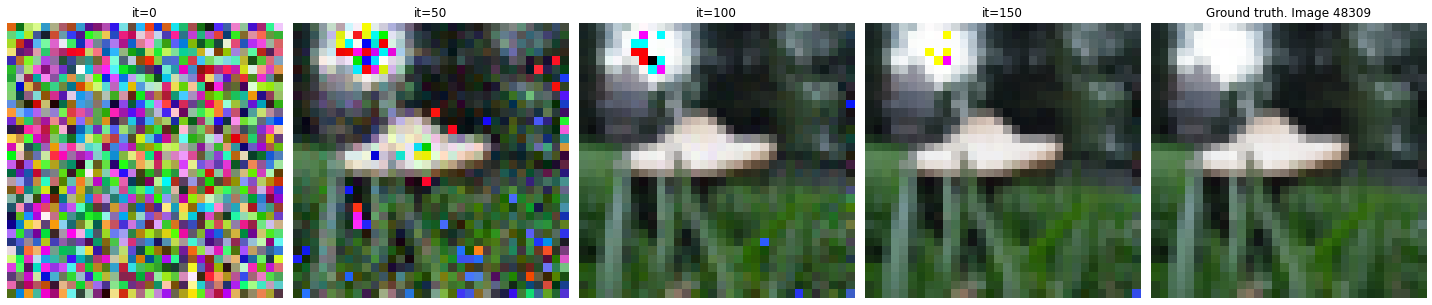

In [5]:
exp.make_reconstruction_plots(figsize=(20,10))

### Run experiment on multiple images/batches to get more descriptive result

In [6]:
exp = Experiment(params, verbose=False)

Running on cpu
Files already downloaded and verified


In [7]:
exp.run_multiple()

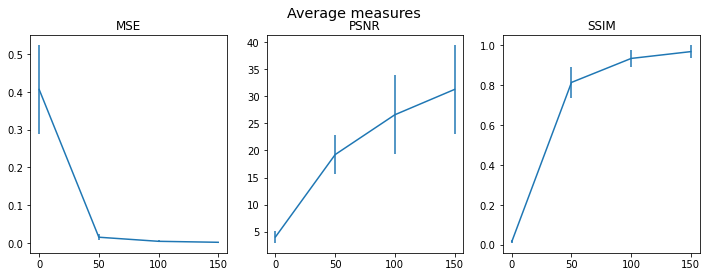

In [8]:
mses = np.mean(exp.losses['mse'], axis=0)
mse_stds = np.std(exp.losses['mse'], axis=0)
psnrs = np.mean(exp.losses['psnr'], axis=0)
psnr_stds = np.std(exp.losses['psnr'], axis=0)
ssims = np.mean(exp.losses['ssim'], axis=0)
ssim_stds = np.std(exp.losses['ssim'], axis=0)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Average measures', fontsize='x-large')
ax[0].errorbar(exp.iters, mses, mse_stds)
ax[0].set_title('MSE')
ax[1].errorbar(exp.iters, psnrs, psnr_stds)
ax[1].set_title('PSNR')
ax[2].errorbar(exp.iters, ssims, ssim_stds)
ax[2].set_title('SSIM')
plt.show()

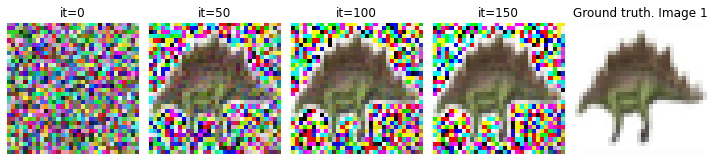

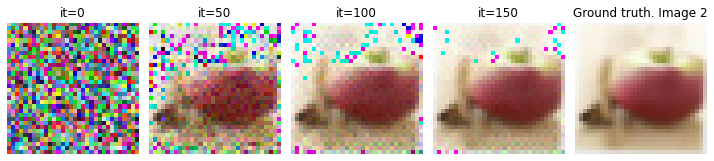

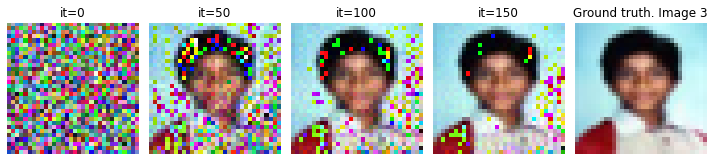

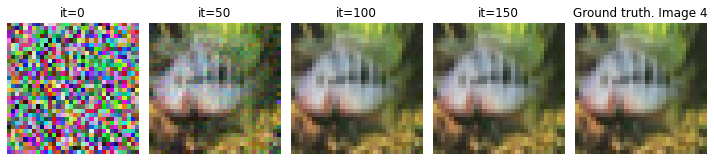

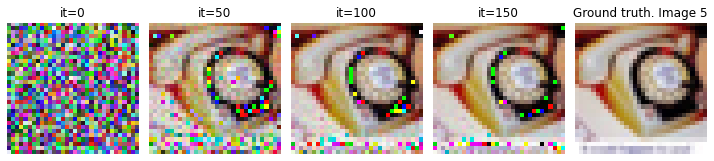

In [9]:
for t_ids in range(exp.n_repeats):
    exp.make_reconstruction_plots(train_id=t_ids, figsize=(10,8))

### Compare with other algorithm

In [10]:
# Read parameters.
name = "DLGunif"
params = read_json('params/'+name+'.json')

torch.manual_seed(1234)

# Load experiment.
exp = Experiment(params, verbose=False)
exp.run_multiple()

Running on cpu
Files already downloaded and verified


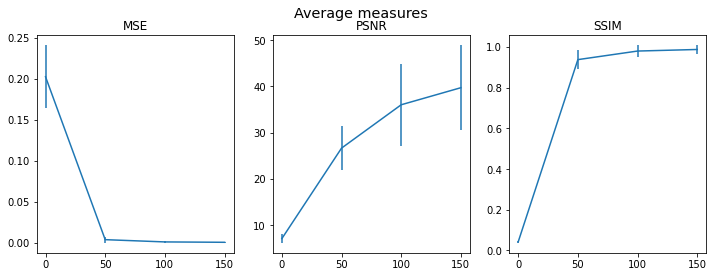

In [11]:
mses = np.mean(exp.losses['mse'], axis=0)
mse_stds = np.std(exp.losses['mse'], axis=0)
psnrs = np.mean(exp.losses['psnr'], axis=0)
psnr_stds = np.std(exp.losses['psnr'], axis=0)
ssims = np.mean(exp.losses['ssim'], axis=0)
ssim_stds = np.std(exp.losses['ssim'], axis=0)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Average measures', fontsize='x-large')
ax[0].errorbar(exp.iters, mses, mse_stds)
ax[0].set_title('MSE')
ax[1].errorbar(exp.iters, psnrs, psnr_stds)
ax[1].set_title('PSNR')
ax[2].errorbar(exp.iters, ssims, ssim_stds)
ax[2].set_title('SSIM')
plt.show()

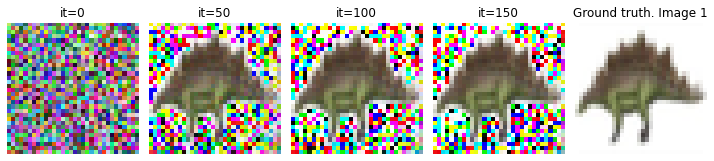

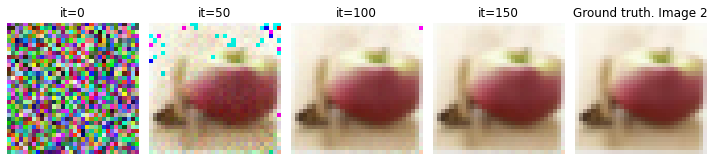

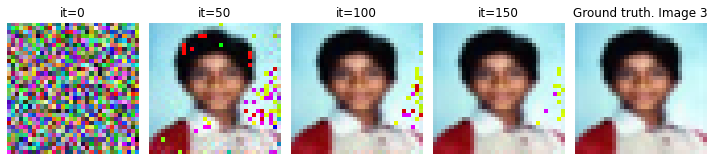

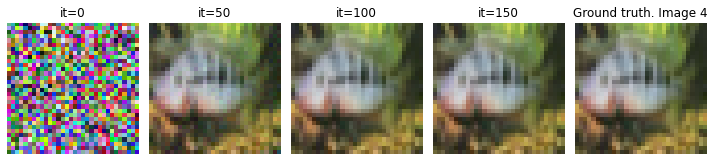

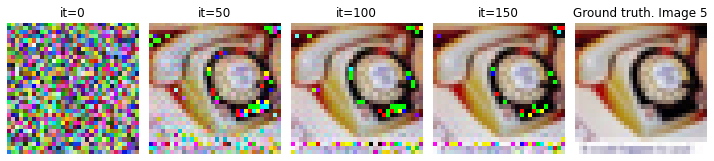

In [12]:
for t_ids in range(exp.n_repeats):
    exp.make_reconstruction_plots(train_id=t_ids, figsize=(10,8))